In [59]:
import pickle
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
import numpy as np
from itertools import product
import seaborn as sns
sns.set()

%matplotlib inline

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [60]:
algs = ["EWC", "Online_EWC", "SI", "LwF"]
btes = [[[[] for i in range(10)] for j in range(6)] for ii in range(8)]
cv = 6

for ii,alg in enumerate(algs):
    for cv_ in range(cv):
        val = []
        for i in range(10):
            filename = './crossval_res/'+alg+str(i+1)+'__'+str(cv_+1)+'.pickle'
            #print(filename)
            res = unpickle(filename)
            #print(res)
            val.append(res[i])
            #print(res, "hi")
            for j in range(i+1):
                btes[ii][cv_][j].append(val[j]/res[j])
                #print(alg,cv_)
        #print(btes)
            
#code for bte of LF

for i in range(cv):
    filename = './crossval_res/LF__'+str(i+1)+'.pickle'
    err = unpickle(filename)
    #eta = [[] for i in range(10)]
    
    '''for j in range(10):
        for jj in range(j+1):
            #eta[j][jj] = err[jj][jj]/err[j][jj]
            eta[j].append(err[jj][jj]/err[j][jj])'''
    
    for j in range(10):
        for jj in range(10-j):
            btes[4][i][j].append(err[j][j]/err[jj+j][j])


#code for Prog-NN & DF-CNN
epoch_indx = list(range(100,1100,100))

for i in range(cv):
    filename = './crossval_res/Prog_NN__'+str(i+1)+'.pickle'
    err = 1 - np.asarray(unpickle(filename))
    err = err[epoch_indx,:]
    
    for j in range(10):
        for jj in range(10-j):
            btes[5][i][j].append(err[j][j]/err[jj+j][j]) 


for i in range(cv):
    filename = './crossval_res/DF_CNN__'+str(i+1)+'.pickle'
    err = 1 - np.asarray(unpickle(filename))
    err = err[epoch_indx,:]
    
    for j in range(10):
        for jj in range(10-j):
            btes[6][i][j].append(err[j][j]/err[jj+j][j]) 


#code for life long dnn
forward_accuracy_cifar, reverse_accuracy_cifar = pickle.load(open('./FTE_BTE_tuple_L2F.p','rb'))
err = reverse_accuracy_cifar.iloc[np.where(reverse_accuracy_cifar['seed']==12345)]
err_ = forward_accuracy_cifar.iloc[np.where(forward_accuracy_cifar['seed']==12345)]
#print(err)
for cv_ in range(cv):
    err_b = err.iloc[np.where(err['shift']==cv_)]
    err_f = 1-np.asarray(err_.iloc[np.where(err_['shift']==cv_)]['forward_accuracy'])
    #print(err_f)
    for j in range(10):
        err_t = 1-np.asarray(err_b.iloc[np.where(err_b['task']==j)]['reverse_accuracy'])
        for jj in range(10-j):
            if jj==0:
                btes[7][cv_][j].append(1)
            else:
                #print(err_f[j],jj,err_t[jj-1])
                btes[7][cv_][j].append(err_f[j]/err_t[jj-1])
        #print(err_t)
        #for jj in range(10-j):
            
        
    #print(err_b)
print(btes[7])

[[[1, 0.8006872852233675, 0.826241134751773, 0.8118466898954703, 0.8132635253054101, 0.7993138936535163, 0.8076256499133448, 0.806228373702422, 0.802065404475043, 0.7965811965811965], [1, 0.9057851239669422, 0.9057851239669422, 0.9028006589785833, 0.9102990033222592, 0.8998357963875206, 0.9042904290429044, 0.9013157894736843, 0.8867313915857606], [1, 0.894736842105263, 0.9066666666666666, 0.8998109640831757, 0.9066666666666666, 0.8981132075471697, 0.9032258064516128, 0.8847583643122675], [1, 0.8205607476635515, 0.8069852941176469, 0.8175046554934823, 0.8069852941176469, 0.8084714548802947, 0.815985130111524], [1, 0.8597122302158272, 0.8475177304964537, 0.8581687612208259, 0.8460176991150443, 0.8535714285714284], [1, 1.0275049115913557, 1.0275049115913557, 1.0155339805825243, 1.011605415860735], [1, 1.0684647302904564, 1.0864978902953588, 1.0774058577405858], [1, 0.9563492063492063, 0.9563492063492063], [1, 0.9581239530988276], [1]], [[1, 0.7944732297063903, 0.8378870673952642, 0.828828

In [61]:
mean_bte = [[[] for i in range(10)] for j in range(8)]


for alg in range(8):
    for j in range(10):
        tmp = 0
        for i in range(6):
            tmp += np.array(btes[alg][i][j])
        
        tmp=tmp/6
        mean_bte[alg][j].append(tmp)

#print(mean_bte)

In [62]:
#calculate average single task error
cv = 6
tasks = 10
mean_single_err = np.zeros(10,dtype=float)

for task in range(tasks):
    for cv_ in range(cv):
        filename = './crossval_res_singletask/single_task'+str(task+1)+'__'+str(cv_+1)+'.pickle'
        err = unpickle(filename)
        #print(err,task,mean_single_err[task])
        mean_single_err[task] += err
        
    mean_single_err[task] = mean_single_err[task]/cv
    
print(mean_single_err)

[0.65633333 0.73333333 0.58416667 0.68116667 0.66666667 0.655
 0.61133333 0.65766667 0.697      0.633     ]


In [63]:
algs = ["EWC", "Online_EWC", "SI", "LwF"]
fte_avg = np.zeros((8,10),dtype=float)
fte = [[[] for i in range(6)] for j in range(8)]

for ii,alg in enumerate(algs):
    for task in range(tasks):
        for cv_ in range(cv):
            filename = './crossval_res/'+alg+str(task+1)+'__'+str(cv_+1)+'.pickle'
            err = unpickle(filename)
            fte[ii][cv_].append(mean_single_err[task]/err[task])
            fte_avg[ii][task] += mean_single_err[task]/err[task]
        fte_avg[ii][task] = fte_avg[ii][task]/6

In [64]:
mean_single_error_LF = np.zeros(10,dtype=float)

for cv_ in range(cv):
    filename = './crossval_res_singletask/LF_single_task__'+str(cv_+1)+'.pickle'
    err = unpickle(filename)
    mean_single_error_LF += err
    
mean_single_error_LF = mean_single_error_LF/6
mean_single_error_LF

array([0.51533333, 0.58283333, 0.49616667, 0.54333333, 0.5155    ,
       0.4755    , 0.45583333, 0.48916667, 0.54416667, 0.49283333])

In [65]:
for task in range(tasks):
    for cv_ in range(cv):
        filename = './crossval_res/'+'LF__'+str(cv_+1)+'.pickle'
        err = unpickle(filename)
        #print(mean_single_error_LF[task],err[task][task],task)
        fte[4][cv_].append(mean_single_error_LF[task]/err[task][task])
        fte_avg[4][task] += mean_single_error_LF[task]/err[task][task]
    fte_avg[4][task] = fte_avg[4][task]/6
        
fte_avg[4]

array([1.00106881, 1.00361973, 0.94868689, 0.98463899, 0.98987067,
       0.94526371, 0.97290169, 0.98549974, 0.99198665, 1.00927452])

In [66]:
mean_single_err_2 = np.zeros((2,10),dtype=float)
algs = ['DF_CNN', 'Prog_NN']

for ii, alg in enumerate(algs):
    for task in range(tasks):
        for cv_ in range(cv):
            filename = './crossval_res_singletask/'+alg+str(task+1)+'__'+str(cv_+1)+'.pickle'
            err = 1-unpickle(filename)[99][0]
            mean_single_err_2[ii][task] += err  
        mean_single_err_2[ii][task] = mean_single_err_2[ii][task]/cv
        
mean_single_err_2[1][0]

0.2838333333333334

In [67]:
#code for Prog-NN & DF-CNN
epoch_indx = list(range(100,1100,100))

for cv_ in range(cv):
    filename = './crossval_res/Prog_NN__'+str(cv_+1)+'.pickle'
    err = 1 - np.asarray(unpickle(filename))
    err = err[epoch_indx,:]
    
    for task in range(tasks):
        #print(fte[5][cv_])
        fte[5][cv_].append(mean_single_err_2[1][task]/err[task][task])
        fte_avg[5][task] += mean_single_err_2[1][task]/err[task][task]
        
fte_avg[5] = fte_avg[5]/6


for cv_ in range(cv):
    filename = './crossval_res/DF_CNN__'+str(cv_+1)+'.pickle'
    err = 1 - np.asarray(unpickle(filename))
    err = err[epoch_indx,:]
    for task in range(tasks):
        fte[6][cv_].append(mean_single_err_2[0][task]/err[task][task])
        fte_avg[6][task] += mean_single_err_2[0][task]/err[task][task]
        
fte_avg[6] = fte_avg[6]/6



In [68]:
#life long dnn cifar results
forward_accuracy_cifar, _ = pickle.load(open('./FTE_BTE_tuple_L2F.p','rb')) #pickle.load(open('./cifar_df_tuple.p','rb'))#pickle.load(open('./lldnn_cifar.p','rb'))

err = forward_accuracy_cifar.iloc[np.where(forward_accuracy_cifar['seed']==12345)]#71652)]
err_1 = np.zeros(10,dtype=float)
print(err)
for i in range(10):
    for cv_ in range(cv):
        tmp = np.asarray(err.iloc[np.where(err['shift']==cv_)]['org_accuracy'])
        print(tmp)
        err_1[i] += 1 - tmp[i]
        #print(tmp['org_accuracy'][cv_*10+i],err_1[i],i)

err_1 /= 6
print(err_1)

for cv_ in range(cv):
    err_f = 1-np.asarray(err.iloc[np.where(err['shift']==cv_)]['forward_accuracy'])
    #print(err_f)
    for task in range(10):
        print(err_1[task]/err_f[task])
        fte[7][cv_].append(err_1[task]/err_f[task])
        fte_avg[7][task] += err_1[task]/err_f[task]

fte_avg[7] /= 6
print(fte_avg[7])
#print(err.iloc[np.where(forward_accuracy_cifar['shift']==0)])

    seed  shift  org_accuracy  task  forward_accuracy
0  12345      0         0.534     0             0.534
1  12345      0         0.449     1             0.452
2  12345      0         0.497     2             0.524
3  12345      0         0.560     3             0.561
4  12345      0         0.516     4             0.522
5  12345      0         0.500     5             0.477
6  12345      0         0.478     6             0.485
7  12345      0         0.523     7             0.518
8  12345      0         0.423     8             0.428
9  12345      0         0.443     9             0.450
0  12345      1         0.540     0             0.540
1  12345      1         0.426     1             0.445
2  12345      1         0.491     2             0.502
3  12345      1         0.529     3             0.551
4  12345      1         0.521     4             0.519
5  12345      1         0.482     5             0.480
6  12345      1         0.464     6             0.459
7  12345      1         0.51

In [69]:
fte[7]

[[0.9889127324749641,
  1.0018248175182483,
  1.0661764705882355,
  1.0611237661351558,
  1.0167364016736402,
  0.9764181007010836,
  1.0511326860841423,
  1.0055325034578146,
  1.0174825174825173,
  0.9599999999999997],
 [1.0018115942028984,
  0.9891891891891894,
  1.0190763052208838,
  1.0374907201187826,
  1.0103950103950106,
  0.9820512820512821,
  1.0006161429451634,
  0.9521938441388342,
  1.0069204152249134,
  1.019305019305019],
 [0.9953203743700503,
  1.047709923664122,
  1.0315040650406506,
  1.0215643274853803,
  0.9739478957915833,
  0.9839434810533078,
  1.013732833957553,
  0.8991960420531849,
  1.0034482758620689,
  0.9981096408317578],
 [0.9846866096866096,
  1.0280898876404494,
  1.0550935550935552,
  1.0126811594202898,
  1.018867924528302,
  0.9993476842791912,
  0.978902953586498,
  0.9392764857881136,
  0.9999999999999998,
  1.0497017892644134],
 [1.0332585949177877,
  1.0497131931166348,
  0.9611742424242425,
  1.053921568627451,
  1.0103950103950106,
  0.97828863

In [70]:
#calculate TE
cv = 6
tasks = 10
mean_single_err = np.zeros(10,dtype=float)

for task in range(tasks):
    for cv_ in range(cv):
        filename = './crossval_res_singletask/single_task'+str(task+1)+'__'+str(cv_+1)+'.pickle'
        err = unpickle(filename)
        #print(err,task,mean_single_err[task])
        mean_single_err[task] += err
        
    mean_single_err[task] = mean_single_err[task]/cv
    
print(mean_single_err)

[0.65633333 0.73333333 0.58416667 0.68116667 0.66666667 0.655
 0.61133333 0.65766667 0.697      0.633     ]


In [71]:
algs = ["EWC", "Online_EWC", "SI", "LwF"]
tes = [[[[] for i in range(10)] for j in range(6)] for ii in range(8)]
cv = 6

for ii,alg in enumerate(algs):
    for cv_ in range(cv):
        val = []
        for i in range(10):
            filename = './crossval_res/'+alg+str(i+1)+'__'+str(cv_+1)+'.pickle'
            #print(filename)
            res = unpickle(filename)
            #print(res)
            val.append(mean_single_err[i])
            #print(res, "hi")
            for j in range(i+1):
                tes[ii][cv_][j].append(val[j]/res[j])
                #print(alg,cv_)
        #print(btes)
            

In [72]:
mean_single_error_LF = np.zeros(10,dtype=float)

for cv_ in range(cv):
    filename = './crossval_res_singletask/LF_single_task__'+str(cv_+1)+'.pickle'
    err = unpickle(filename)
    
    print(err)
    mean_single_error_LF += err
    
mean_single_error_LF = mean_single_error_LF/6
mean_single_error_LF

[0.491 0.58  0.489 0.564 0.522 0.477 0.485 0.476 0.533 0.485]
[0.51  0.572 0.481 0.549 0.53  0.481 0.448 0.516 0.536 0.483]
[0.503 0.591 0.51  0.551 0.51  0.458 0.451 0.462 0.546 0.519]
[0.518 0.583 0.507 0.533 0.491 0.492 0.458 0.492 0.548 0.507]
[0.526 0.59  0.502 0.545 0.509 0.465 0.454 0.501 0.558 0.496]
[0.544 0.581 0.488 0.518 0.531 0.48  0.439 0.488 0.544 0.467]


array([0.51533333, 0.58283333, 0.49616667, 0.54333333, 0.5155    ,
       0.4755    , 0.45583333, 0.48916667, 0.54416667, 0.49283333])

In [73]:
#code for te of LF

for i in range(cv):
    filename = './crossval_res/LF__'+str(i+1)+'.pickle'
    err = unpickle(filename)
    
    print(err)
    
    for j in range(10):
        for jj in range(10-j):
            tes[4][i][j].append(mean_single_error_LF[j]/err[jj+j][j])

[[0.491], [0.486, 0.579], [0.48, 0.5900000000000001, 0.522], [0.484, 0.579, 0.526, 0.569], [0.485, 0.5860000000000001, 0.527, 0.569, 0.512], [0.492, 0.589, 0.524, 0.571, 0.518, 0.504], [0.491, 0.587, 0.521, 0.5720000000000001, 0.513, 0.496, 0.504], [0.488, 0.587, 0.519, 0.5720000000000001, 0.514, 0.492, 0.503, 0.492], [0.485, 0.5920000000000001, 0.526, 0.573, 0.515, 0.499, 0.496, 0.496, 0.55], [0.488, 0.591, 0.522, 0.573, 0.519, 0.498, 0.5, 0.499, 0.5589999999999999, 0.47]]
[[0.51], [0.516, 0.5840000000000001], [0.514, 0.5860000000000001, 0.514], [0.513, 0.583, 0.523, 0.5469999999999999], [0.51, 0.583, 0.518, 0.552, 0.538], [0.505, 0.577, 0.517, 0.558, 0.5389999999999999, 0.498], [0.509, 0.5920000000000001, 0.517, 0.56, 0.54, 0.5, 0.45899999999999996], [0.508, 0.587, 0.515, 0.556, 0.5389999999999999, 0.506, 0.46199999999999997, 0.526], [0.502, 0.5880000000000001, 0.517, 0.556, 0.5389999999999999, 0.504, 0.46099999999999997, 0.525, 0.5489999999999999], [0.505, 0.5920000000000001, 0.518,

In [74]:
mean_single_err_2 = np.zeros((2,10),dtype=float)
algs = ['DF_CNN', 'Prog_NN']

for ii, alg in enumerate(algs):
    for task in range(tasks):
        for cv_ in range(cv):
            filename = './crossval_res_singletask/'+alg+str(task+1)+'__'+str(cv_+1)+'.pickle'
            err = 1-unpickle(filename)[99][0]
            mean_single_err_2[ii][task] += err  
        mean_single_err_2[ii][task] = mean_single_err_2[ii][task]/cv
        
mean_single_err_2[1][0]

0.2838333333333334

In [75]:
#code for Prog-NN & DF-CNN
epoch_indx = list(range(100,1100,100))

for i in range(cv):
    filename = './crossval_res/Prog_NN__'+str(i+1)+'.pickle'
    err = 1 - np.asarray(unpickle(filename))
    err = err[epoch_indx,:]
    
    for j in range(10):
        for jj in range(10-j):
            tes[5][i][j].append(mean_single_err_2[1][j]/err[jj+j][j]) 
 

for i in range(cv):
    filename = './crossval_res/DF_CNN__'+str(i+1)+'.pickle'
    err = 1 - np.asarray(unpickle(filename))
    err = err[epoch_indx,:]
    
    for j in range(10):
        for jj in range(10-j):
            tes[6][i][j].append(mean_single_err_2[0][j]/err[jj+j][j]) 

In [76]:
#code for LL DNN

forward_accuracy_cifar, reverse_accuracy_cifar = pickle.load(open('./FTE_BTE_tuple_L2F.p','rb')) #pickle.load(open('./cifar_df_tuple.p','rb'))

err = forward_accuracy_cifar.iloc[np.where(forward_accuracy_cifar['seed']==12345)]
err_1 = np.zeros(10,dtype=float)

for i in range(10):
    for cv_ in range(cv):
        tmp = np.asarray(err.iloc[np.where(err['shift']==cv_)]['org_accuracy'])
        err_1[i] += 1 - tmp[i]
        #print(tmp['org_accuracy'][cv_*10+i],err_1[i],i)

err_1 /= 6


err = reverse_accuracy_cifar.iloc[np.where(reverse_accuracy_cifar['seed']==12345)]
err_ = forward_accuracy_cifar.iloc[np.where(forward_accuracy_cifar['seed']==12345)]
#print(err)
for cv_ in range(cv):
    err_b = err.iloc[np.where(err['shift']==cv_)]
    err_f = 1-np.asarray(err_.iloc[np.where(err_['shift']==cv_)]['forward_accuracy'])
    #print(err_f)
    for j in range(10):
        err_t = 1-np.asarray(err_b.iloc[np.where(err_b['task']==j)]['reverse_accuracy'])
        for jj in range(10-j):
            if jj==0:
                #print(err_1[j],j,err_f[j])
                tes[7][cv_][j].append(err_1[j]/err_f[j])
            else:
                #print(err_1[j],j,err_t[jj-1])
                tes[7][cv_][j].append(err_1[j]/err_t[jj-1])

In [77]:
tes[7][0]

[[0.9889127324749641,
  0.7918098510882013,
  0.8170803782505908,
  0.8028455284552843,
  0.8042466550319953,
  0.7904516866781017,
  0.7986712882726746,
  0.7972895040369087,
  0.7931726907630522,
  0.7877492877492877],
 [1.0018248175182483,
  0.9074380165289258,
  0.9074380165289258,
  0.9044481054365734,
  0.9119601328903656,
  0.9014778325123154,
  0.9059405940594061,
  0.9029605263157896,
  0.8883495145631068],
 [1.0661764705882355,
  0.9539473684210527,
  0.9666666666666668,
  0.9593572778827978,
  0.9666666666666668,
  0.9575471698113208,
  0.9629981024667933,
  0.9433085501858737],
 [1.0611237661351558,
  0.8707165109034269,
  0.8563112745098038,
  0.867473618870267,
  0.8563112745098038,
  0.8578882750153469,
  0.8658612143742255],
 [1.0167364016736402,
  0.8741007194244604,
  0.8617021276595744,
  0.872531418312388,
  0.8601769911504427,
  0.8678571428571429],
 [0.9764181007010836,
  1.0032743942370663,
  1.0032743942370663,
  0.9915857605177995,
  0.9877498388136686],
 [1.05

In [78]:
mean_eta = [[[] for i in range(10)] for j in range(8)]


for alg in range(8):
    for j in range(10):
        tmp = 0
        for i in range(6):
            tmp += np.array(tes[alg][i][j])
        
        tmp=tmp/6
        mean_eta[alg][j].append(tmp)

print(mean_eta[7])

[[array([1.00024411, 0.8096318 , 0.83895054, 0.84387594, 0.85553556,
       0.85282625, 0.85854582, 0.86200416, 0.86559141, 0.86483324])], [array([1.02604996, 0.89097017, 0.9066247 , 0.91849471, 0.92620728,
       0.92200083, 0.92855778, 0.92691822, 0.92560627])], [array([1.02777159, 0.95879927, 0.9772131 , 0.97112742, 0.97621457,
       0.97112832, 0.97210347, 0.97235934])], [array([1.02554012, 0.83922802, 0.84361418, 0.84594131, 0.84592114,
       0.84975136, 0.8526413 ])], [array([1.00927645, 0.91339929, 0.9129638 , 0.9172627 , 0.91339063,
       0.9145622 ])], [array([0.99023042, 1.02091778, 1.02196106, 1.02242276, 1.02437134])], [array([1.00186883, 1.14013173, 1.15291685, 1.14557195])], [array([0.95982114, 0.96903339, 0.96975283])], [array([1.00902443, 1.04995625])], [array([1.03082106])]]


In [79]:
eta= [mean_eta[4], mean_eta[7], mean_eta[6], mean_eta[1], mean_eta[0], mean_eta[2], mean_eta[3], mean_eta[5]]

In [80]:
te = {'LF':np.zeros(10,dtype=float), 'LL-DNN':np.zeros(10,dtype=float), 'DF-CNN':np.zeros(10,dtype=float),'Online EWC':np.zeros(10,dtype=float), 'EWC':np.zeros(10,dtype=float), 'SI':np.zeros(10,dtype=float), 'LwF':np.zeros(10,dtype=float), 'Prog-NN':np.zeros(10,dtype=float)}

for count,name in enumerate(te.keys()):
    for i in range(10):
        te[name][i] = eta[count][i][0][9-i]
        
np.mean(te['LL-DNN'])

0.9750475783218409

In [81]:
import pandas as pd
df = pd.DataFrame.from_dict(te)
df_ = pd.melt(df,var_name='Algorithms', value_name='Transfer Efficieny')
#ax = sns.stripplot(x="day", y="total_bill", data=tips)
print(df_)

   Algorithms  Transfer Efficieny
0          LF            0.974607
1          LF            0.984817
2          LF            0.940887
3          LF            0.976692
4          LF            0.978967
..        ...                 ...
75    Prog-NN            0.991733
76    Prog-NN            1.008675
77    Prog-NN            1.013511
78    Prog-NN            0.965276
79    Prog-NN            1.052027

[80 rows x 2 columns]


In [82]:
mean_te = {'LF':[0.9921188934936789], 'LN':[1.0928893384862772], 'DF-CNN':[0.75],'Online EWC':[0.96], 'EWC':[0.97], 'SI':[0.86], 'LwF':[1.00], 'Prog-NN':[1.02]}
mean_df = pd.DataFrame.from_dict(mean_te)
mean_df = pd.melt(mean_df,var_name='Algorithms', value_name='Transfer Efficieny')
print(mean_df)

   Algorithms  Transfer Efficieny
0          LF            0.992119
1          LN            1.092889
2      DF-CNN            0.750000
3  Online EWC            0.960000
4         EWC            0.970000
5          SI            0.860000
6         LwF            1.000000
7     Prog-NN            1.020000


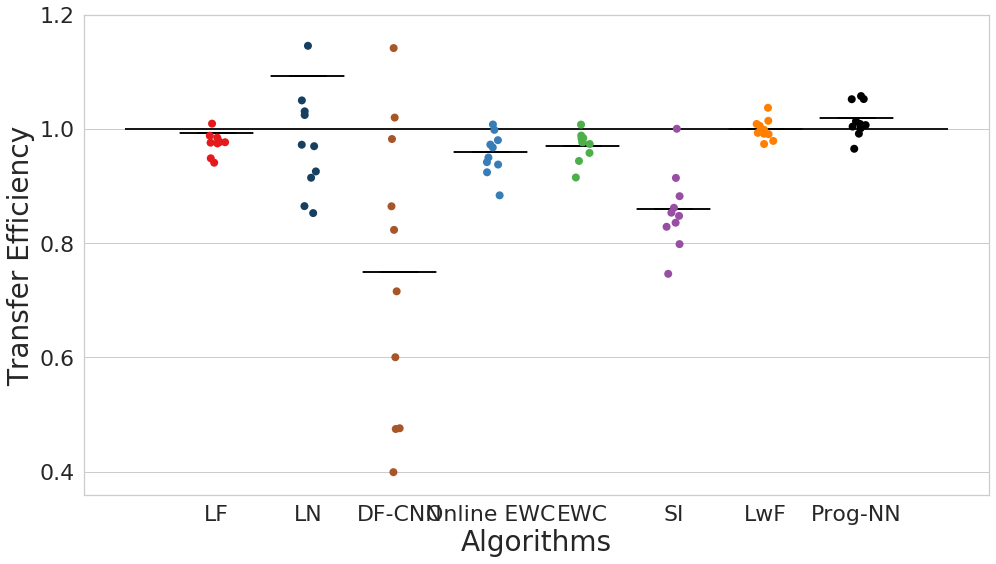

In [83]:
import seaborn as sns
sns.set(style="whitegrid")
clr = ["#e41a1c", "#173F5F","#a65628", "#377eb8", "#4daf4a", "#984ea3", "#ff7f00", "#000000"]
c = sns.color_palette(clr, n_colors=len(clr))

fig, ax = plt.subplots(1,1, figsize=(14,8))
ax.tick_params(labelsize=22)
ax_ = sns.stripplot(x="Algorithms", y="Transfer Efficieny", data=df_, palette=c, size=8, ax=ax)
sns.boxplot(x="Algorithms", y="Transfer Efficieny", data=mean_df, palette=c, ax=ax)
ax.hlines(1, -1,8, colors='k', linestyles='solid',linewidth=2)
ax_.set_yticks([.4,.6,.8,1, 1.2])
ax_.set_xlabel('Algorithms', fontsize=28)
ax_.set_ylabel('Transfer Efficiency', fontsize=28)
plt.savefig('TE.png', dpi=500)

In [84]:
names = ['Lifelong Forest', 'Lifelong Network', 'DF-CNN','Online EWC', 'EWC', 'SI', 'LwF', 'Prog-NN']
all_ftes = [fte_avg[4], fte_avg[7], fte_avg[6], fte_avg[1], fte_avg[0], fte_avg[2], fte_avg[3], fte_avg[5]]
mean_rte = [mean_bte[4], mean_bte[7], mean_bte[6], mean_bte[1], mean_bte[0], mean_bte[2], mean_bte[3], mean_bte[5]]
mean_eta_ = [mean_eta[4], mean_eta[7], mean_eta[6], mean_eta[1], mean_eta[0], mean_eta[2], mean_eta[3], mean_eta[5]]

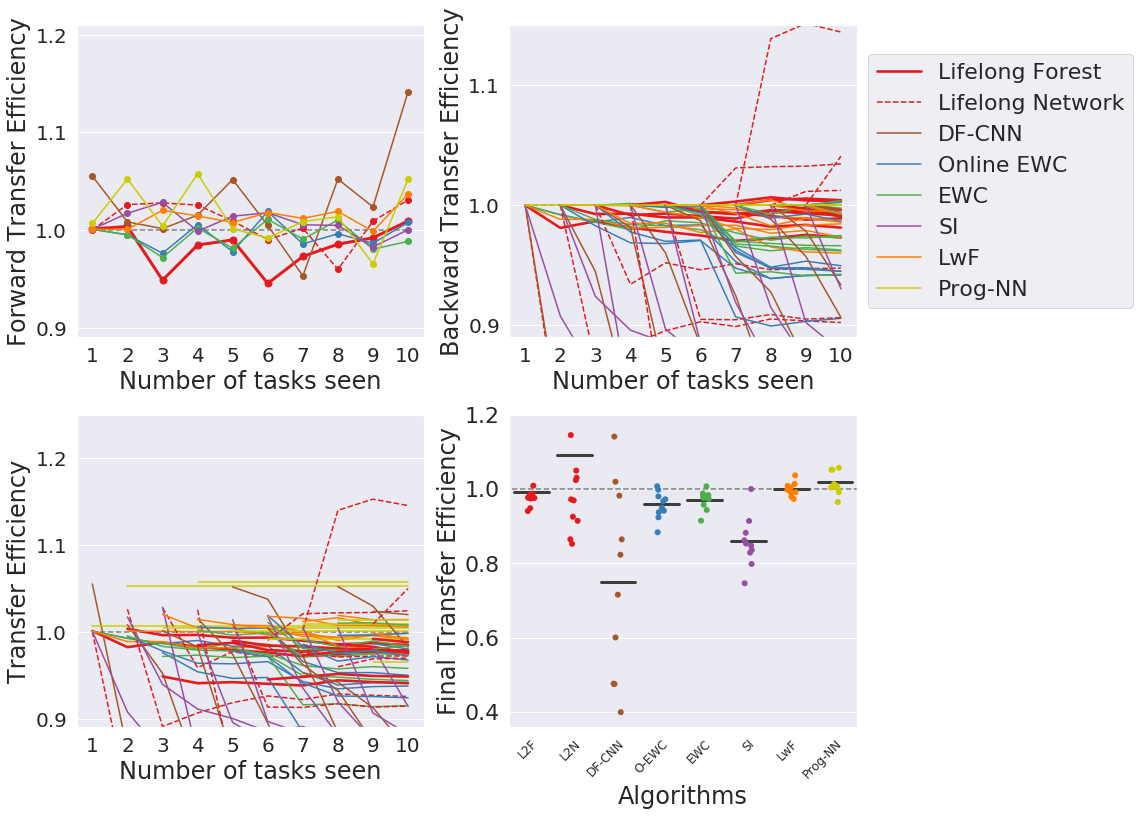

In [85]:
sns.set()
algos = names
fte = all_ftes
eta = mean_rte


clr = ["#e41a1c", "#e41a1c", "#a65628", "#377eb8", "#4daf4a", "#984ea3", "#ff7f00", "#CCCC00"]
c = sns.color_palette(clr, n_colors=len(clr))

fontsize=24
ticksize=20

fig, ax = plt.subplots(2,2, figsize=(16,11.5))
# plt.subplots_adjust(right=0.5)
items = []
for i, fte in enumerate(all_ftes):
    if i == 0:
        ax[0][0].plot(np.arange(1,11), fte, c=clr[i], marker='.', markersize=14, label=algos[i], linewidth=3)
        continue
        
    if i == 1:
        ax[0][0].plot(np.arange(1,11), fte, c=clr[i], marker='.', linestyle='dashed', markersize=12, label=algos[i])
        continue

    item = ax[0][0].plot(np.arange(1,11), fte, c=clr[i], marker='.', markersize=12, label=algos[i])
    items.append(item)
    
ax[0][0].set_xticks(np.arange(1,11))
ax[0][0].set_yticks([0.9, 1.0, 1.1, 1.2])
ax[0][0].set_ylim(0.89, 1.21)
ax[0][0].tick_params(labelsize=ticksize)
# ax[0].legend(algos, loc='upper left', fontsize=14)
# ax[0].legend(algos, bbox_to_anchor=(1.2, -.2), loc=2, borderaxespad=0)

ax[0][0].set_ylabel('Forward Transfer Efficiency', fontsize=fontsize)
ax[0][0].set_xlabel('Number of tasks seen', fontsize=fontsize)

ax[0][0].grid(axis='x')

n_tasks=10
n_alg=len(algos)
c = sns.color_palette(clr, n_colors=len(algos))
for i in range(n_tasks - 1):

    et = np.zeros((n_alg,n_tasks-i))

    for j in range(0,n_alg):
        et[j,:] = np.asarray(eta[j][i])

    ns = np.arange(i + 1, n_tasks + 1)
    for j in range(0,n_alg):
        if j == 0:
            if i == 0:
                ax[0][1].plot(ns, et[j,:], label = algos[j], c=c[j], linewidth = 2.6)
            else:
                ax[0][1].plot(ns, et[j,:], c=c[j], linewidth = 2.6)
        elif j==1:
            if i == 0:
                ax[0][1].plot(ns, et[j,:], label = algos[j], c=c[j], linestyle='dashed')
            else:
                ax[0][1].plot(ns, et[j,:], c=c[j], linestyle='dashed')
        else:
            if i == 0:
                ax[0][1].plot(ns, et[j,:], label = algos[j], c=c[j])
            else:
                ax[0][1].plot(ns, et[j,:], c=c[j])


# ax[1].set_title(ttle, fontsize=20)
ax[0][1].set_xlabel('Number of tasks seen', fontsize=fontsize)
ax[0][1].set_ylabel('Backward Transfer Efficiency', fontsize=fontsize)
# ax.set_ylim(0.05 - 0.01, 0.5 + 0.01)
# box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax[1].legend(loc='upper left', fontsize=12)
ax[0][1].legend(loc='center left', bbox_to_anchor=(1,0.5), fontsize=22)
ax[0][1].set_yticks([.4,.6,.8,.9,1, 1.1,1.2])
ax[0][1].set_xticks(np.arange(1,11))
ax[0][1].set_ylim(0.89, 1.15)
ax[0][1].tick_params(labelsize=ticksize)
ax[0][1].grid(axis='x')


n_tasks=10
n_alg=len(algos)
c = sns.color_palette(clr, n_colors=len(algos))
for i in range(n_tasks - 1):

    et = np.zeros((n_alg,n_tasks-i))

    for j in range(0,n_alg):
        et[j,:] = np.asarray(mean_eta_[j][i])

    ns = np.arange(i + 1, n_tasks + 1)
    for j in range(0,n_alg):
        if j == 0:
            if i == 0 or i==1:
                ax[1][0].plot(ns, et[j,:], label = algos[j], c=c[j], linewidth = 2.6)
            else:
                ax[1][0].plot(ns, et[j,:], c=c[j], linewidth = 2.6)
                
        elif j == 1:
            if i == 0 or i==1:
                ax[1][0].plot(ns, et[j,:], label = algos[j], c=c[j], linestyle='dashed')
            else:
                ax[1][0].plot(ns, et[j,:], c=c[j], linestyle='dashed')
        else:
            if i == 0 or i==1:
                ax[1][0].plot(ns, et[j,:], label = algos[j], c=c[j])
            else:
                ax[1][0].plot(ns, et[j,:], c=c[j])


# ax[1].set_title(ttle, fontsize=20)
ax[1][0].set_xlabel('Number of tasks seen', fontsize=fontsize)
ax[1][0].set_ylabel('Transfer Efficiency', fontsize=fontsize)
# ax.set_ylim(0.05 - 0.01, 0.5 + 0.01)
# box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax[1].legend(loc='upper left', fontsize=12)
#ax[1][0].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=22)
ax[1][0].set_yticks([.4,.6,.8,.9,1, 1.1,1.2])
ax[1][0].set_xticks(np.arange(1,11))
ax[1][0].set_ylim(0.89, 1.25)
ax[1][0].tick_params(labelsize=ticksize)
ax[1][0].grid(axis='x')

ax[0][0].hlines(1, 1,10, colors='grey', linestyles='dashed',linewidth=1.5)
ax[0][1].hlines(1, 1,10, colors='grey', linestyles='dashed',linewidth=1.5)
ax[1][0].hlines(1, 1,10, colors='grey', linestyles='dashed',linewidth=1.5)



ax[1][1].tick_params(labelsize=22)
ax_ = sns.stripplot(x="Algorithms", y="Transfer Efficieny", data=df_, palette=c, size=6, ax=ax[1][1])
ax[1][1].hlines(1, -1,8, colors='grey', linestyles='dashed',linewidth=1.5)
sns.boxplot(x="Algorithms", y="Transfer Efficieny", data=mean_df, palette=c, linewidth=3, ax=ax[1][1])
ax_.set_yticks([.4,.6,.8,1, 1.2])
ax_.set_xlabel('Algorithms', fontsize=fontsize)
ax_.set_ylabel('Final Transfer Efficiency', fontsize=fontsize)
ax_.set_xticklabels(['L2F','L2N','DF-CNN','O-EWC','EWC','SI','LwF','Prog-NN'],fontsize=12,rotation=45,ha="right",rotation_mode='anchor')

plt.tight_layout()
# lgd = fig.legend(algos, bbox_to_anchor=(1, 0.45), loc='center left', fontsize=18)
plt.savefig('fte_bte_wide.png', dpi=500)

In [28]:
res = unpickle('./rotation_res/EWC_10.pickle')
print(res)

[0.68075 0.6921 ]


In [879]:
alg = 7
tmp_min = np.zeros(10,dtype=float)
tmp_cv = np.zeros(6,dtype=float)
tmp_std = 0

for cv_ in range(6):
    for i in range(10):
        tmp_min = tes[alg][cv_][i][9-i]
    tmp_cv[cv_] = np.min(tmp_min)

print(np.round(np.std(tmp_cv)/np.sqrt(6),2))

0.02


In [880]:
alg = 7
tmp = np.zeros(10,dtype=float)

for i in range(10):
    tmp[i] = mean_eta[alg][i][0][9-i]

In [881]:
print(np.std(tmp)/np.sqrt(10), np.min(tmp), np.mean(tmp))

0.00864092087229303 1.127748457221111 1.1557984468118065


In [896]:
fte = np.asarray([fte[7][0][9],fte[7][1][9],fte[7][2][9],fte[7][3][9],fte[7][4][9],fte[7][5][9]])

print(np.std(fte)/np.sqrt(6), np.mean(fte))

0.015816458609152595 1.1608081238366712


In [902]:
bte = np.asarray([btes[7][0][0][9],btes[7][1][0][9],btes[7][2][0][9],btes[7][3][0][9],btes[7][4][0][9],btes[7][5][0][9]])

print(np.std(bte)/np.sqrt(6), np.mean(bte))

0.006940703498806975 1.1202300927573694


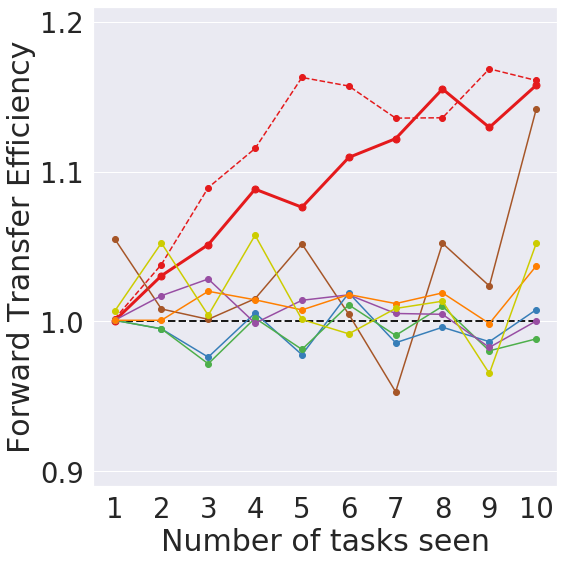

In [969]:
sns.set()
algos = names
fte = all_ftes
eta = mean_rte


clr = ["#e41a1c", "#e41a1c", "#a65628", "#377eb8", "#4daf4a", "#984ea3", "#ff7f00", "#CCCC00"]
c = sns.color_palette(clr, n_colors=len(clr))

fontsize=30
ticksize=27.5

fig, ax = plt.subplots(1,1, figsize=(8,8))
# plt.subplots_adjust(right=0.5)
items = []
for i, fte in enumerate(all_ftes):
    if i == 0:
        ax.plot(np.arange(1,11), fte, c=clr[i], marker='.', markersize=14, label=algos[i], linewidth=3)
        continue
        
    if i == 1:
        ax.plot(np.arange(1,11), fte, c=clr[i], marker='.', linestyle='dashed', markersize=12, label=algos[i])
        continue

    item = ax.plot(np.arange(1,11), fte, c=clr[i], marker='.', markersize=12, label=algos[i])
    items.append(item)
    
ax.set_xticks(np.arange(1,11))
ax.set_yticks([0.9, 1.0, 1.1, 1.2])
ax.set_ylim(0.89, 1.21)
ax.tick_params(labelsize=ticksize)
# ax[0].legend(algos, loc='upper left', fontsize=14)
# ax[0].legend(algos, bbox_to_anchor=(1.2, -.2), loc=2, borderaxespad=0)

ax.set_ylabel('Forward Transfer Efficiency', fontsize=fontsize)
ax.set_xlabel('Number of tasks seen', fontsize=fontsize)

ax.grid(axis='x')
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=22)
ax.hlines(1, 1,10, colors='k', linestyles='dashed',linewidth=2)

plt.savefig('FTE.pdf',dpi=2000)

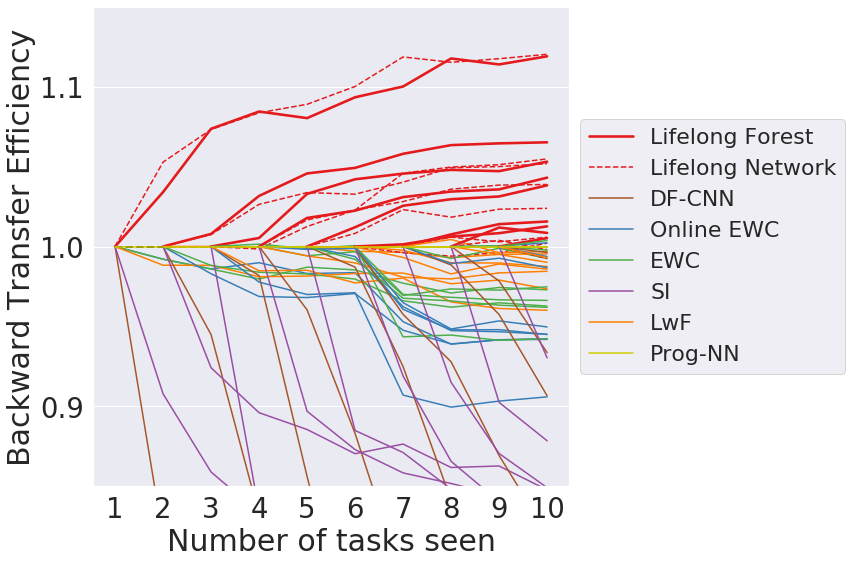

In [966]:
sns.set()
algos = names
fte = all_ftes
eta = mean_rte


clr = ["#e41a1c", "#e41a1c", "#a65628", "#377eb8", "#4daf4a", "#984ea3", "#ff7f00", "#CCCC00"]
c = sns.color_palette(clr, n_colors=len(clr))

fontsize=30
ticksize=27.5

fig, ax = plt.subplots(1,1, figsize=(12,8))
# plt.subplots_adjust(right=0.5)

n_tasks=10
n_alg=len(algos)
c = sns.color_palette(clr, n_colors=len(algos))
for i in range(n_tasks - 1):

    et = np.zeros((n_alg,n_tasks-i))

    for j in range(0,n_alg):
        et[j,:] = np.asarray(eta[j][i])

    ns = np.arange(i + 1, n_tasks + 1)
    for j in range(0,n_alg):
        if j == 0:
            if i == 0:
                ax.plot(ns, et[j,:], label = algos[j], c=c[j], linewidth = 2.6)
            else:
                ax.plot(ns, et[j,:], c=c[j], linewidth = 2.6)
        elif j==1:
            if i == 0:
                ax.plot(ns, et[j,:], label = algos[j], c=c[j], linestyle='dashed')
            else:
                ax.plot(ns, et[j,:], c=c[j], linestyle='dashed')
        else:
            if i == 0:
                ax.plot(ns, et[j,:], label = algos[j], c=c[j])
            else:
                ax.plot(ns, et[j,:], c=c[j])


# ax[1].set_title(ttle, fontsize=20)
ax.set_xlabel('Number of tasks seen', fontsize=fontsize)
ax.set_ylabel('Backward Transfer Efficiency', fontsize=fontsize)
# ax.set_ylim(0.05 - 0.01, 0.5 + 0.01)
# box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax[1].legend(loc='upper left', fontsize=12)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=22)
ax.set_yticks([.4,.6,.8,.9,1, 1.1,1.2])
ax.set_xticks(np.arange(1,11))
ax.set_ylim(0.85, 1.15)
ax.tick_params(labelsize=ticksize)
ax.grid(axis='x')
ax.hlines(1, 1,10, colors='k', linestyles='dashed',linewidth=2)

plt.tight_layout()
# lgd = fig.legend(algos, bbox_to_anchor=(1, 0.45), loc='center left', fontsize=18)
plt.savefig('BTE.pdf', dpi=2000)

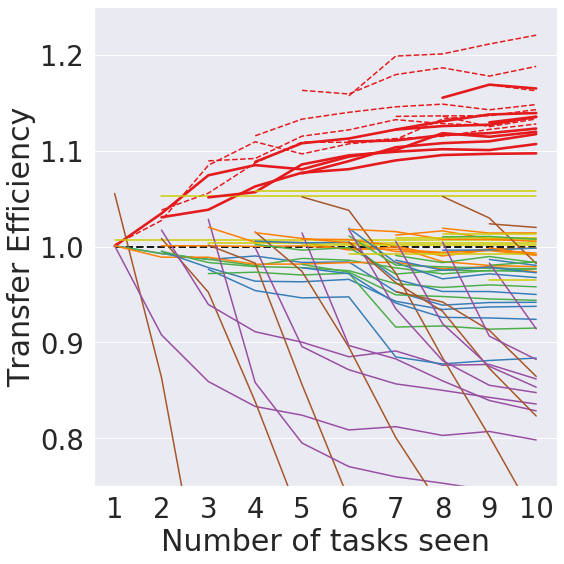

In [967]:
sns.set()
algos = names
fte = all_ftes
eta = mean_rte


clr = ["#e41a1c", "#e41a1c", "#a65628", "#377eb8", "#4daf4a", "#984ea3", "#ff7f00", "#CCCC00"]
c = sns.color_palette(clr, n_colors=len(clr))

fontsize=30
ticksize=27.5

fig, ax = plt.subplots(1,1, figsize=(8,8))
# plt.subplots_adjust(right=0.5)


n_tasks=10
n_alg=len(algos)
c = sns.color_palette(clr, n_colors=len(algos))
for i in range(n_tasks - 1):

    et = np.zeros((n_alg,n_tasks-i))

    for j in range(0,n_alg):
        et[j,:] = np.asarray(mean_eta_[j][i])

    ns = np.arange(i + 1, n_tasks + 1)
    for j in range(0,n_alg):
        if j == 0:
            if i == 0:
                ax.plot(ns, et[j,:], label = algos[j], c=c[j], linewidth = 2.6)
            else:
                ax.plot(ns, et[j,:], c=c[j], linewidth = 2.6)
                
        elif j == 1:
            if i==0:
                ax.plot(ns, et[j,:], label = algos[j], c=c[j], linestyle='dashed')
            else:
                ax.plot(ns, et[j,:], c=c[j], linestyle='dashed')
        else:
            if i == 0:
                ax.plot(ns, et[j,:], label = algos[j], c=c[j])
            else:
                ax.plot(ns, et[j,:], c=c[j])


# ax[1].set_title(ttle, fontsize=20)
ax.set_xlabel('Number of tasks seen', fontsize=fontsize)
ax.set_ylabel('Transfer Efficiency', fontsize=fontsize)
# ax.set_ylim(0.05 - 0.01, 0.5 + 0.01)
# box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax[1].legend(loc='upper left', fontsize=12)
#ax[1][0].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=22)
ax.set_yticks([.4,.6,.8,.9,1, 1.1,1.2])
ax.set_xticks(np.arange(1,11))
ax.set_ylim(0.75, 1.25)
ax.tick_params(labelsize=ticksize)
ax.grid(axis='x')
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=22)
ax.hlines(1, 1,10, colors='k', linestyles='dashed',linewidth=2)




plt.tight_layout()
# lgd = fig.legend(algos, bbox_to_anchor=(1, 0.45), loc='center left', fontsize=18)
plt.savefig('TE.pdf', dpi=2000)

In [1]:
sns.set()
algos = names
fte = all_ftes
eta = mean_rte


clr = ["#e41a1c", "#e41a1c", "#a65628", "#377eb8", "#4daf4a", "#984ea3", "#ff7f00", "#CCCC00"]
c = sns.color_palette(clr, n_colors=len(clr))

fontsize=30
ticksize=27.5

fig, ax = plt.subplots(1,1, figsize=(8,8))


ax.tick_params(labelsize=ticksize)
ax_ = sns.stripplot(x="Algorithms", y="Transfer Efficieny", data=df_, palette=c, size=6, ax=ax)
ax.hlines(1, -1,8, colors='grey', linestyles='dashed',linewidth=1.5)
sns.boxplot(x="Algorithms", y="Transfer Efficieny", data=mean_df, palette=c, linewidth=3, ax=ax)
ax_.set_yticks([.4,.6,.8,1, 1.2])
ax_.set_xlabel('Algorithms', fontsize=fontsize)
ax_.set_ylabel('Final Transfer Efficiency', fontsize=fontsize)
ax_.set_xticklabels([])

plt.tight_layout()
# lgd = fig.legend(algos, bbox_to_anchor=(1, 0.45), loc='center left', fontsize=18)
plt.savefig('scatter.pdf', dpi=2000)

NameError: name 'sns' is not defined

In [86]:
reverse_accuracy_cifar

,seed,shift,org_accuracy,task,task_seen,reverse_accuracy
0,12345,0,0.412,0,1,0.418
1,12345,0,0.412,0,2,0.436
2,12345,0,0.412,0,3,0.426
3,12345,0,0.412,0,4,0.427
4,12345,0,0.412,0,5,0.417
5,12345,0,0.412,0,6,0.423
6,12345,0,0.412,0,7,0.422
7,12345,0,0.412,0,8,0.419
8,12345,0,0.412,0,9,0.415
9,12345,0,0.379,1,2,0.395


In [87]:
forward_accuracy_cifar

,seed,shift,org_accuracy,task,forward_accuracy
0,12345,0,0.534,0,0.534
1,12345,0,0.449,1,0.452
2,12345,0,0.497,2,0.524
3,12345,0,0.560,3,0.561
4,12345,0,0.516,4,0.522
5,12345,0,0.500,5,0.477
6,12345,0,0.478,6,0.485
7,12345,0,0.523,7,0.518
8,12345,0,0.423,8,0.428
9,12345,0,0.443,9,0.450
